In [1]:
import sys
sys.path.append("/home/macbuse/miniconda3/lib/python3.11/site-packages")

import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.stats as stats

/tmp/ipykernel_20193/1822434047.py:7: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.5)
  import scipy.stats as stats



# Exercice n° 4. Ehrenfest

On considère le modèle de l’urne d’Ehrenfest à $N$ particules et on suppose que $N$ est pair.  
On note $(X_N(t))_{t \ge 0}$ la chaîne de Markov associée à espace d’états $\{0,\ldots,N\}$.

---


1. Représentez des trajectoires de longueur $1000$ de cette chaîne partant de  
   $X_N(0) = 0$ et pour $N = 10, 100$ et $1000$.

---

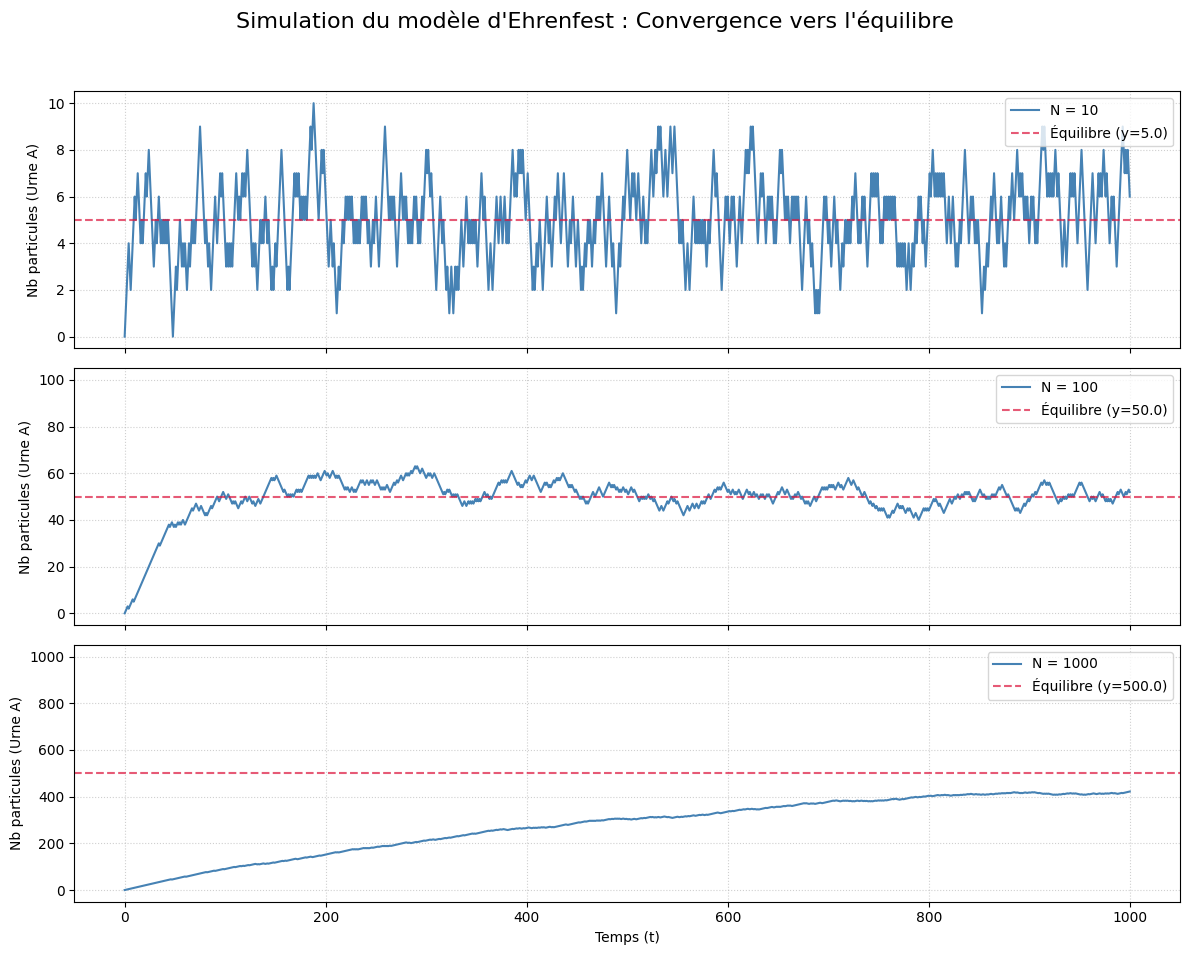

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simuler_ehrenfest(N, longueur=1000):
    """
    Simule une trajectoire de l'urne d'Ehrenfest de longueur n.
    X_t : nombre de boules dans l'urne A.
    """
    trajectoire = np.empty(longueur + 1, dtype=int)
    trajectoire[0] = 0  # Condition initiale
    
    # Génération des probabilités uniformes pour les transitions
    unif = np.random.rand(longueur)
    
    for t in range(longueur):
        i = trajectoire[t]
        # Probabilité de monter (i -> i+1) : (N-i)/N
        if unif[t] < (N - i) / N:
            trajectoire[t+1] = i + 1
        else:
            trajectoire[t+1] = i - 1
            
    return trajectoire

# Paramètres
N_values = [10, 100, 1000]
longueur = 1000

# Utilisation de fig, axes (subplots)
fig, axes = plt.subplots(len(N_values), 1, figsize=(12, 10), sharex=True)

for ax, N in zip(axes, N_values):
    traj = simuler_ehrenfest(N, longueur)
    
    # Tracé de la trajectoire
    ax.plot(traj, color='steelblue', lw=1.5, label=f"N = {N}")
    
    # Ligne d'équilibre théorique (N/2)
    ax.axhline(y=N/2, color='crimson', linestyle='--', alpha=0.7, label=f"Équilibre (y={N/2})")
    
    # Personnalisation de l'axe
    ax.set_ylabel("Nb particules (Urne A)")
    ax.set_ylim(-N*0.05, N*1.05) # Marge pour la lisibilité
    ax.legend(loc="upper right")
    ax.grid(True, which='both', linestyle=':', alpha=0.6)

# Configuration globale
axes[-1].set_xlabel("Temps (t)")
fig.suptitle("Simulation du modèle d'Ehrenfest : Convergence vers l'équilibre", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

---

2. Lorsque $N = 6$, déterminer numériquement
la mesure de probabilité invariante en résolvant 
un système linéaire, et comparez-la à la loi stationnaire. Commenter.

---

## Question 2 : Mesure Invariante pour $N=6$

### 1. Détermination du Système Linéaire
La mesure invariante $\pi = (\pi_0, \pi_1, \ldots, \pi_N)$ est le vecteur de probabilité qui satisfait l'équation d'équilibre :
$$\pi P = \pi$$

Pour l'urne d'Ehrenfest, la chaîne est réversible. Les équations de balance locale entre l'état $i$ et $i+1$ s'écrivent :
$$\pi_i P(i, i+1) = \pi_{i+1} P(i+1, i)$$

En remplaçant par les probabilités de transition $P(i, i+1) = \frac{N-i}{N}$ et $P(i+1, i) = \frac{i+1}{N}$, on obtient la relation de récurrence :
$$\pi_i \left( \frac{N-i}{N} \right) = \pi_{i+1} \left( \frac{i+1}{N} \right) \implies \pi_{i+1} = \frac{N-i}{i+1} \pi_i$$

### 2. Résolution Numérique
Numériquement, on résout le système $(P^T - I)\pi^T = 0$ sous la contrainte de normalisation $\sum_{i=0}^{N} \pi_i = 1$. Pour $N=6$, la matrice de transition $P$ est de taille $7 \times 7$. La résolution par calcul de vecteur propre (associé à la valeur propre $\lambda = 1$) donne les poids de probabilité pour chaque état.



### 3. Comparaison avec la Loi Stationnaire Théorique
La théorie stipule que pour ce modèle, la loi stationnaire est la **loi binomiale** $\mathcal{B}(N, 1/2)$. 
La probabilité théorique pour chaque état $i$ est :
$$\pi_i = \binom{N}{i} \left(\frac{1}{2}\right)^N = \frac{\binom{N}{i}}{2^N}$$

Pour $N=6$ ($2^6 = 64$), les valeurs sont :
* $\pi_0 = \pi_6 = 1/64 \approx 0.0156$
* $\pi_1 = \pi_5 = 6/64 \approx 0.0938$
* $\pi_2 = \pi_4 = 15/64 \approx 0.2344$

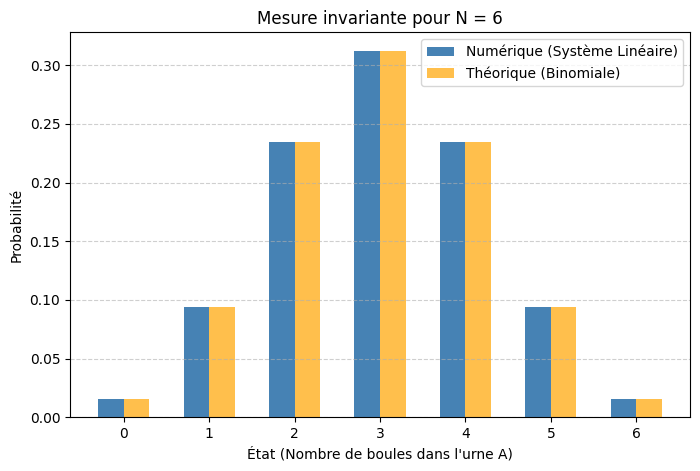

État   | Numérique    | Théorique   
-----------------------------------
0      | 0.0156       | 0.0156      
1      | 0.0937       | 0.0938      
2      | 0.2344       | 0.2344      
3      | 0.3125       | 0.3125      
4      | 0.2344       | 0.2344      
5      | 0.0938       | 0.0938      
6      | 0.0156       | 0.0156      


In [3]:
import numpy as np
from scipy.stats import binom

N = 6
etats = np.arange(N + 1)

# 1. Construction de la matrice de transition P
P = np.zeros((N + 1, N + 1))
for i in range(N + 1):
    if i > 0:
        P[i, i-1] = i / N          # Probabilité de descendre
    if i < N:
        P[i, i+1] = (N - i) / N    # Probabilité de monter

# 2. Résolution numérique du système πP = π
# On cherche le vecteur propre à gauche associé à 1
eig_vals, eig_vecs = np.linalg.eig(P.T)
# On récupère l'indice de la valeur propre 1
idx = np.argmin(np.abs(eig_vals - 1))
pi_num = np.real(eig_vecs[:, idx])
pi_num = pi_num / np.sum(pi_num)  # Normalisation

# 3. Calcul de la loi stationnaire théorique (Binomiale)
pi_theo = binom.pmf(etats, N, 0.5)

# 4. Comparaison graphique
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(etats - 0.15, pi_num, width=0.3, label='Numérique (Système Linéaire)', color='steelblue')
ax.bar(etats + 0.15, pi_theo, width=0.3, label='Théorique (Binomiale)', color='orange', alpha=0.7)

ax.set_xlabel("État (Nombre de boules dans l'urne A)")
ax.set_ylabel("Probabilité")
ax.set_title(f"Mesure invariante pour N = {N}")
ax.set_xticks(etats)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

# Affichage des valeurs pour comparaison
print(f"{'État':<6} | {'Numérique':<12} | {'Théorique':<12}")
print("-" * 35)
for i in range(N + 1):
    print(f"{i:<6} | {pi_num[i]:<12.4f} | {pi_theo[i]:<12.4f}")

In [ ]:
3. Lorsque $N = 6$, comparer la distribution empirique de  
   $(X_N(0), \ldots, X_N(1000))$ à la loi stationnaire.



In [ ]:
4. Lorsque $N = 1000$, estimez la loi de $X_N(1000)$ et comparez-la à la loi stationnaire, en comparant les fonctions de répartition.



In [ ]:
5. Pour $N = 10, 100$ puis $1000$, estimez l’espérance du temps d’atteinte de $N/2$ partant de $0$.  
   Comparer au résultat théorique concernant l’espérance du temps de retour en $0$ partant de $0$ et commenter.
